In [147]:
import pickle
def dump(obj,filename):
    filehandler = open(filename,"wb")
    pickle.dump(obj,filehandler)
    filehandler.close()

def load(filename):
    file = open(filename,'rb')
    obj = pickle.load(file)
    file.close()
    return obj

In [1]:
# Import CSV file
import pandas as pd
import numpy as np
df = pd.read_csv('Consumer_Complaints.csv')

In [2]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [4]:
#removes empty narrative rows
rows1 = df.shape
row1 = rows1[0]
df = df[pd.notnull(df['Consumer complaint narrative'])] # ONLY KEEPSROWS WITH NON-NAN VALUES IN COLUMN i
rows2 = df.shape
row2 = rows2[0]
difference = row1 - row2
print("original set had "+str(row1)+" observations")
print(str(difference)+" rows had blank narratives")
print(str(row2)+" observations will be analyzed")
df = df.reset_index(drop=True)
# string_counts = Counter(df['Company']) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
# string_counts = OrderedDict(string_counts.most_common())

original set had 917185 observations
703370 rows had blank narratives
213815 observations will be analyzed


In [13]:
companies = list(df['Company'])
print(type(companies))
print("Total entries")
print(len(companies))
print("Unique companies in complains")
set_companies = set(companies)
print(len(set_companies))

<class 'list'>
Total entries
213815
Unique companies in complains
3376


In [15]:
from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
string_counts = Counter(df['Company']) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
print("\nDictionary with counts for company\n")
print(string_counts)


Dictionary with counts for company

Counter({'EQUIFAX, INC.': 19875, 'TRANSUNION INTERMEDIATE HOLDINGS, INC.': 14204, 'Experian Information Solutions Inc.': 14058, 'WELLS FARGO & COMPANY': 8987, 'BANK OF AMERICA, NATIONAL ASSOCIATION': 8594, 'CITIBANK, N.A.': 8370, 'Navient Solutions, LLC.': 8094, 'JPMORGAN CHASE & CO.': 7703, 'CAPITAL ONE FINANCIAL CORPORATION': 4853, 'OCWEN LOAN SERVICING LLC': 3671, 'SYNCHRONY FINANCIAL': 3648, 'NATIONSTAR MORTGAGE': 3271, 'Ditech Financial LLC': 2711, 'U.S. BANCORP': 2682, 'AMERICAN EXPRESS COMPANY': 2477, 'ENCORE CAPITAL GROUP INC.': 2072, 'AES/PHEAA': 2048, 'PORTFOLIO RECOVERY ASSOCIATES INC': 2001, 'DISCOVER BANK': 1722, 'PAYPAL HOLDINGS INC.': 1524, 'ERC': 1497, 'PNC Bank N.A.': 1451, 'TD BANK US HOLDING COMPANY': 1377, 'BARCLAYS BANK DELAWARE': 1347, 'SELECT PORTFOLIO SERVICING, INC.': 1253, 'SANTANDER CONSUMER USA HOLDINGS INC.': 1215, 'SUNTRUST BANKS, INC.': 1061, 'TRANSWORLD SYSTEMS INC': 1046, 'UNITED SERVICES AUTOMOBILE ASSOCIATION': 104

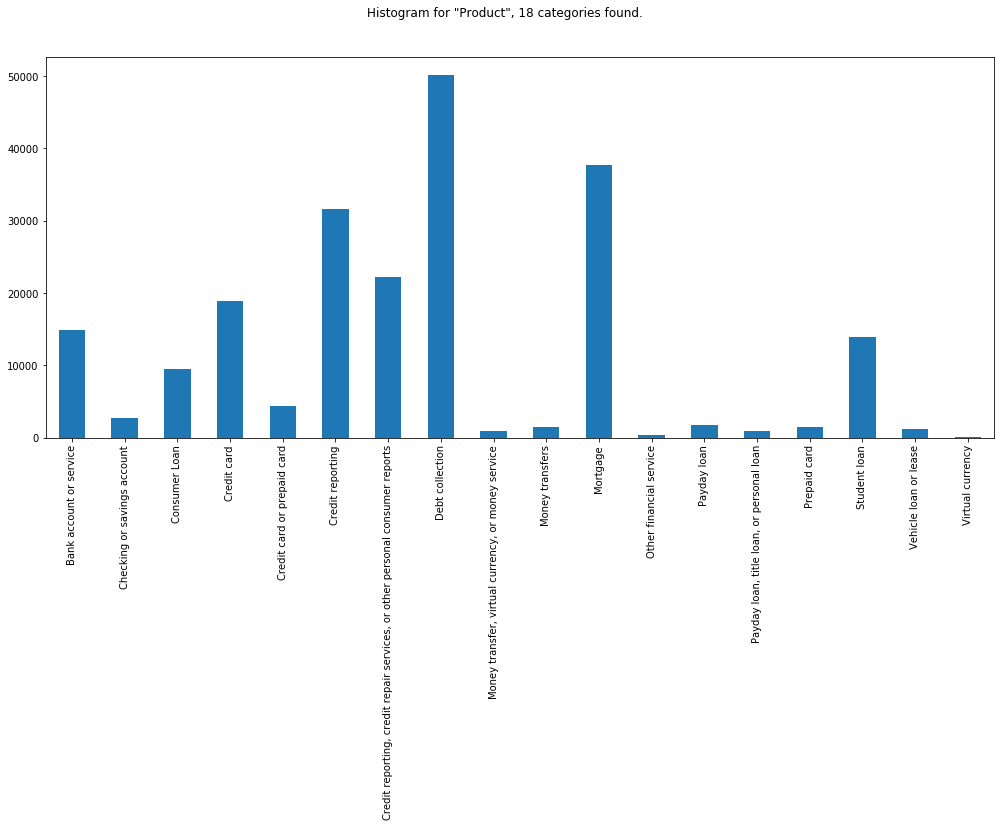

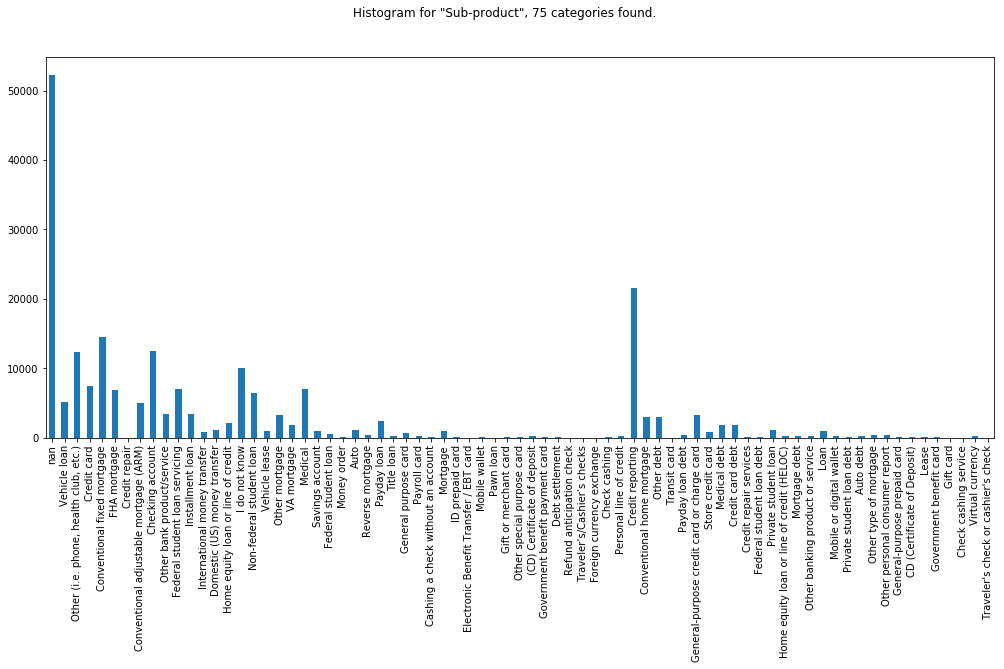

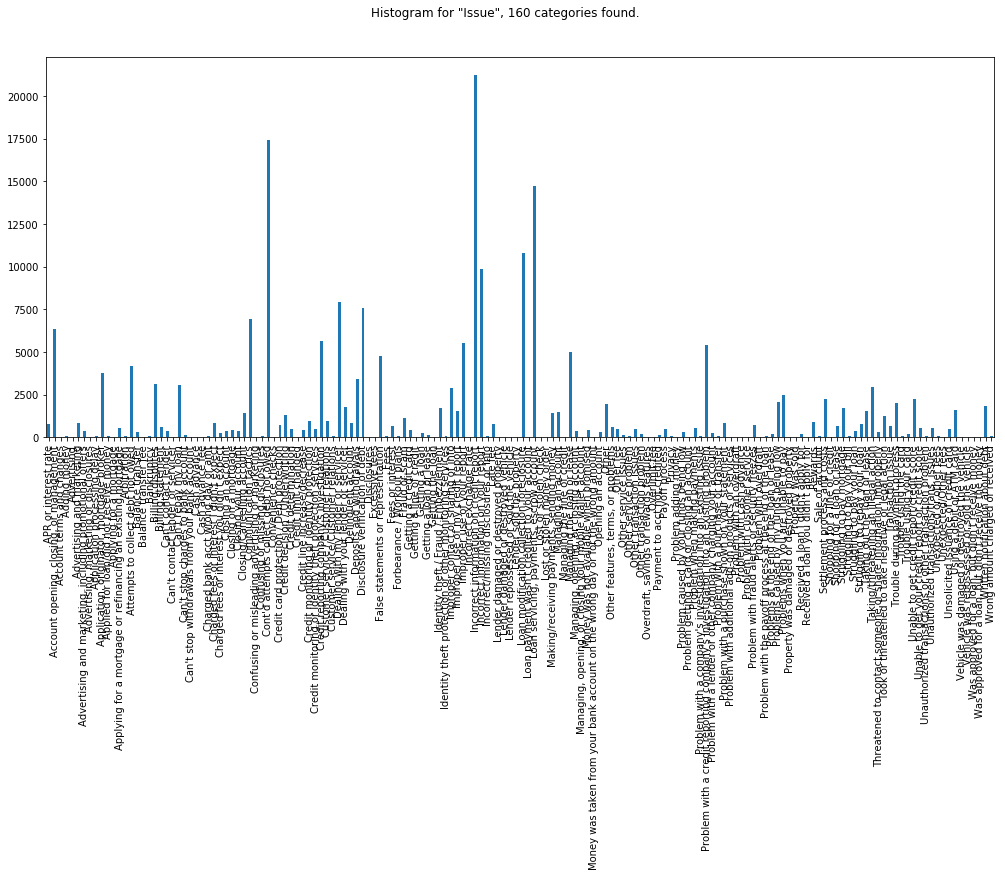

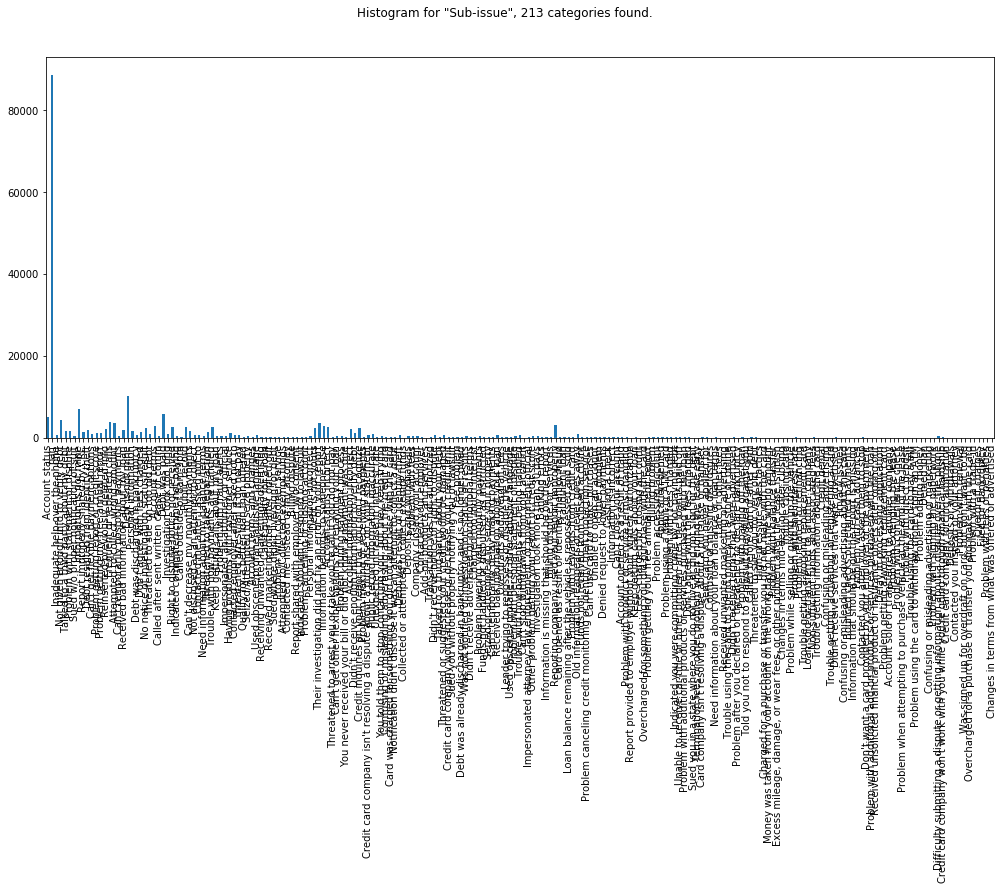

In [17]:
# DATA EXPLORATION FOR RELEVANT CATEGORIES
from collections import Counter, OrderedDict # CALLS COUNTER FUNCTION
from matplotlib import pyplot
categories = ['Product','Sub-product','Issue','Sub-issue']
k = 1
for i in categories:
    string_counts = Counter(df['{0}'.format(i)]) # CREATES A LIST THAT COUNTS THE REPETITIONS OF A STRING
    #string_counts = OrderedDict(string_counts.most_common())
    pyplot.figure(k, figsize=(17, 7)) # CREATES A FIGURE WITH THE DIMENSIONS INDICATED
    converted_series=pd.Series(Counter(string_counts)) # CREATES A SERIE FROM THE COUNTER CLASS
    converted_series.plot(kind='bar') # PLOTS THE SERIES INTO BOX PLOT
    pyplot.suptitle('Histogram for "{0}", '.format(i)+str(len(string_counts))+" categories found.") # GIVES THE MAIN TITLE
    pyplot.show() # DISPLAYS THE FIGURE
    k += 1
# FOR NEXT ITERATION TRY TO GET THE MOST COMMON

In [144]:
import nltk,re,pprint
def preprocess_complaint_narratives(df): # receives argument df. Is this dataframe?
    counter = 0
    print(df.shape)
    sentences = [] # CREATES AN EMPTY LIST FOR SENTECES. IS THIS SUPPOSED TO BE EMPTY?
    for doc in df: # FOR EVERY ANNOTATION IN THE CONSUMER COMPLAINT FIELD
        #Sentence tokenize
        sent = nltk.sent_tokenize(doc) # GIVE SOMETHING TO MAKE THE TOKENS IN THE SENTENCES
        #print(sent)
        #word tokenize
        sent = [nltk.word_tokenize(s) for s in sent] # TURNS SENTENCES INTO WORDS | CODE WAS MODIFIED
        #Part of speech tagging
        sent = [nltk.pos_tag(s) for s in sent] # NOT SURE ABOUT THIS SECTION | CODE WAS MODIFIED
        for s in sent: # RUNS LOOP FOR ALL ITEMS IN SENT
            sentences.append(s) # APPENDS ALL THE ITEMS INTO SENTENCE
        counter +=1
        if counter%20000 == 0:
            print("Pre process at")
            print(counter)
    return sentences

In [145]:
def give_me_tree(tokens):
    counter = 0
    tree = []
    print(len(tokens))
    for t in tokens:
        tree.append(nltk.chunk.ne_chunk(t))
        counter += 1
        if counter%20000 == 0:
            print("Pre process at")
            print(counter)
    return tree
        

In [146]:
compNarr = df['Consumer complaint narrative'] # Consumer narrative 
# banks = set(df['Company']) # CREATES A __SET__  OF THE COMPANIES NAMES
compNarr = compNarr
tokens = preprocess_complaint_narratives(compNarr) # compNarr

(213815,)
Pre process at
10000
Pre process at
20000
Pre process at
30000
Pre process at
40000
Pre process at
50000
Pre process at
60000
Pre process at
70000
Pre process at
80000
Pre process at
90000
Pre process at
100000
Pre process at
110000
Pre process at
120000
Pre process at
130000
Pre process at
140000
Pre process at
150000
Pre process at
160000
Pre process at
170000
Pre process at
180000
Pre process at
190000
Pre process at
200000
Pre process at
210000


#### The list of tokens created is way too big, almost 1gb of memory. The tree for this list is going to be huge

In [148]:
dump(tokens, 'tokenized_complaints.pkl')

In [137]:
tree = give_me_tree(tokens)
#print(tree)

Pre process at
500
Pre process at
1000
Pre process at
1500
Pre process at
2000
Pre process at
2500
Pre process at
3000
Pre process at
3500
Pre process at
4000
Pre process at
4500
Pre process at
5000
Pre process at
5500
Pre process at
6000
Pre process at
6500
Pre process at
7000
Pre process at
7500
Pre process at
8000
Pre process at
8500
Pre process at
9000


In [138]:
def extract_label_names(t): # EXTRACTS THE ENTITIES NAMES
    entity_label = [] # CREATES AN EMPTY LIST TO PUT THE NAMES. OR IS IT SUPPOSSED TO BE SOMETHING ELSE?
    if hasattr(t, 'label') and t.label():  # first part returns true if t has an attribute called label, the second part returns true if it exists 
        # hasattr: The arguments are an object and a string. The result is True if the string is the name of one of the object’s attributes, False if not.
        entity_label.append(t.label())
        #print(t.label())
        for child in t: # what is child? # Recursive to look for the label organizaiton within t
            entity_label.extend(extract_label_names(child))
    return entity_label
entity_labels = []
for t in tree: # LOOP THROUGH THE ITEMS OF THE TREE
    entity_labels.extend(extract_label_names(t)) # "APPENDS" t (ENTITY) TO THE LIST


In [139]:
counts = {}
for i in entity_labels:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True) # reverse order
print(sort_counts)

[('S', 9339), ('ORGANIZATION', 7102), ('GPE', 1082), ('PERSON', 967), ('GSP', 17), ('LOCATION', 7), ('FACILITY', 1)]


In [103]:
def extract_entity_names(t): # EXTRACTS THE ENTITIES NAMES
    entity_names = [] # CREATES AN EMPTY LIST TO PUT THE NAMES. OR IS IT SUPPOSSED TO BE SOMETHING ELSE?
    if hasattr(t, 'label') and t.label():  # first part returns true if t has an attribute called label, the second part returns true if it exists 
        # hasattr: The arguments are an object and a string. The result is True if the string is the name of one of the object’s attributes, False if not.
        if t.label() == 'ORGANIZATION': # MAYBE LABEL IS SOMETHING LIKE ORGANIZATION OR ENTITY
            entity_names.append(' '.join([child[0] for child in t])) # something missing
        else:
            for child in t: # what is child? # Recursive to look for the label organizaiton within t
                entity_names.extend(extract_entity_names(child))
    return entity_names

In [80]:
# ENTITY NAME EXTRACTOR FROM COMPLAINS
entity_names = [] # list as container

for t in tree: # LOOP THROUGH THE ITEMS OF THE TREE
    entity_names.extend(extract_entity_names(t)) # "APPENDS" t (ENTITY) TO THE LIST
#print(entity_names)

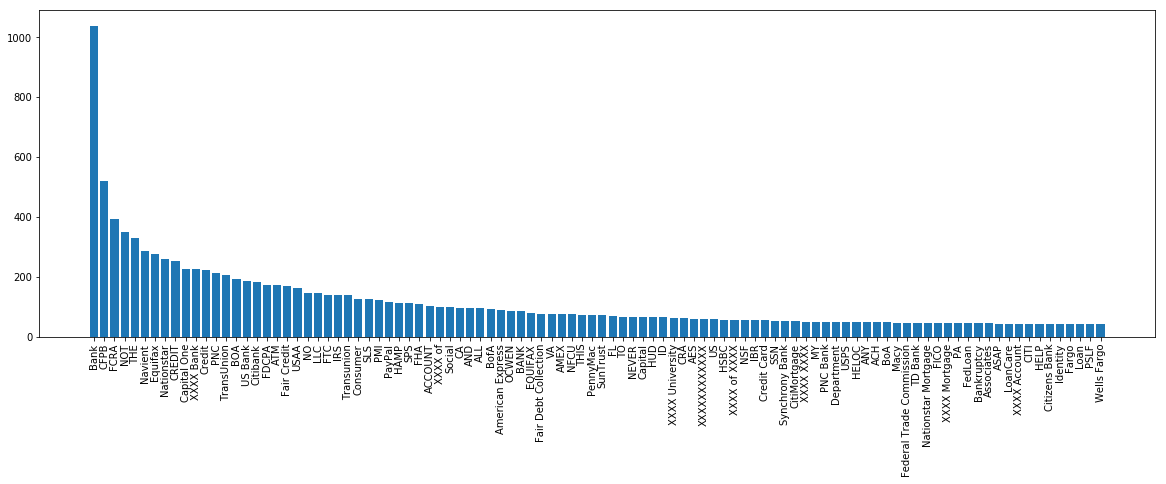

In [89]:
from matplotlib import pyplot as plt
counts = {}
for i in entity_names:
    if(i in counts):
        counts[i] +=1
    else:
        counts[i] = 1
sort_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True) # reverse order
data = []
for i in sort_counts:
    data.append(i[1])
ticks = []
for i in sort_counts:
    ticks.append(i[0])
plt.figure(1, figsize=(20, 6)) 
plt.bar(range(100),data[1:101], align='center') # find the upper value to graph
plt.xticks(range(100), ticks[1:101]) # find the upper value to graph
pyplot.xticks(rotation=90)
plt.show() # displays the graph

In [ ]:
# # df['Consumer complaint narrative'][4]
# from nltk import word_tokenize, pos_tag, ne_chunk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# sentence = df['Consumer complaint narrative'][4]
# print(sentence)
# algo = ne_chunk(pos_tag(word_tokenize(sentence)))
# print(algo)